现在来了一批新数据，大概是关于对一篇文章的评论数，点赞数做一些研究

我先看一下数据集长什么样子

In [43]:
#这个方式是用代码的方式，
from csv import reader
hn=list(reader(open('hacker_news.csv',encoding='utf-8')))
headers=hn[0]
hn=hn[1:]

In [44]:
#先来看一下标题
headers

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

可以看到有这么七个字段

对于对数据进行一个总体的认识，我觉得，Excel反而更好用。
使用工具的时候要注意最终我想要达到什么效果，而不是在意使用什么形式

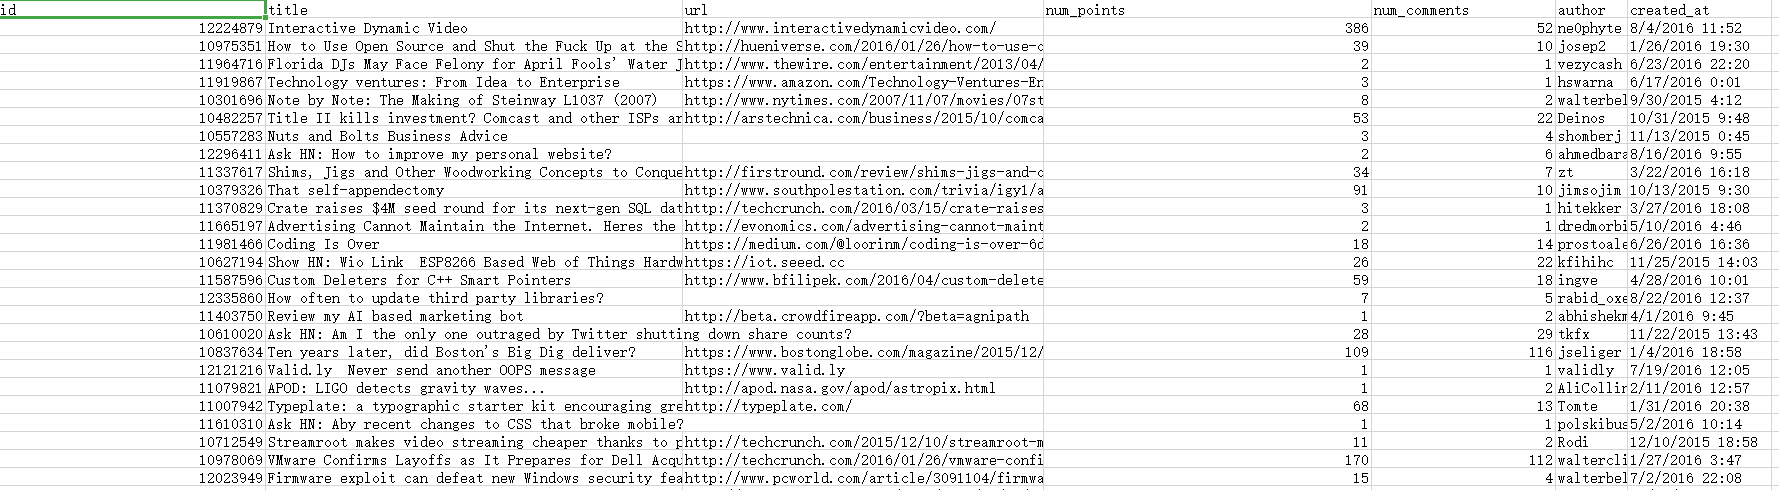
可以看到，有如下几个字段：
1. ID（有些字段基本没啥用，比如这个）
2. 文章的标题
3. 文章对应的网址
3. 点赞数
4. 评论数
1. 作者
5. 创建时间

当我们看到标题的字段的时候，我们发现有一些，标题，开头是以“ask HN”、“show HN”来打头的

比如：

> Ask HN: How to improve my personal website?

> Ask HN: Am I the only one outraged by Twitter shutting down share counts?

> Ask HN: Aby recent changes to CSS that broke mobile?

> Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform'

> Show HN: Something pointless I made

> Show HN: Shanhu.io, a programming playground powered by e8vm

然后呢，我们关注的问题就是：
**既然以“ask”、“show HN”这样的文章那么多，那我我们有理由猜测：这样的文章的评论数会更多吗？**

还有一个问题，**不同的时间的评论数是不一样的，那么，是不是中午的时候大家讨论的热情更高？**

我们先来找一找有哪些数据是符合我们的标题要求的，即开始是以“Ask HN ”“Show HN”来打头的

In [45]:
#新建三个列表用来存放三种类型的列表，以‘ask’打头的，以‘show’打头的，剩下的就是其他的文章
ask_posts=[]
show_post=[]
other_post=[]

In [46]:
for row in hn:
    title=row[1]
    if title.startswith('Ask HN'):
        ask_posts.append(row)
    elif title.startswith('Show HN'):
        show_post.append(row)
    else:
        other_post.append(row)

现在我们来看看每一种标题各有多少个

In [47]:
print(len(ask_posts))
print(len(show_post))
print(len(other_post))

1742
1161
17197


将每种文章分好类，我们就可以计算以“ask”开头的文章、以及以“show”开头的文章，他们的文章的平均评论数了

In [48]:
sum=0
for row in ask_posts:
    sum+=float(row[4])
print("ask_posts中的评论总数有："+str(sum))
print('ask类型的文章平均评论数为：'+str(sum/len(ask_posts)))

ask_posts中的评论总数有：24466.0
ask类型的文章平均评论数为：14.044776119402986


In [49]:
sum=0
for row in show_post:
    sum+=float(row[4])
print("show_post中的评论总数有："+str(sum))
print('show类型文章的平均评论数为：'+ str(sum/len(show_post)))

show_post中的评论总数有：11987.0
show类型文章的平均评论数为：10.324720068906116


最终我们得出结论，那些向 hacker news 提出问题的文章，收获的评论数更多。

别忘了我们还有第二个问题，我们想知道，在什么时间段内，大家的评论热情更大。我们以研究这个 ask_postst 为例。

要想得出结论，我们需要做到：
1. 首先统计一天内每个小时的收到的评论数量
2. 然后计算每个小时收到的评论的平均数量

In [50]:
# 我们首选导入处理时间的模块，然后新建一个用于存放文章评论数、时间戳的列表
import datetime as dt
result_list=[]

In [51]:
ask_posts[5][6]

'9/26/2015 23:23'

时间的格式是上面那个样子的

In [52]:
for row in ask_posts:
    line=[]
    line.append(row[6])#create_at 
    number = int(row[4])
    line.append(number)# number of comment
    result_list.append(line)
    

In [53]:
# 我们建两个字典，分别是统计二十四个小时的文章数，以及评论总数
counts_by_hour={}
comments_by_hour={}

对于时间的格式，我们先做一个调研

In [54]:
#我们先随便建一个时间格式，就像下面这个
date_1_str = "December 24, 1984"
#然后我们使用dt.datetime.strptime(时间的字符串，字符串格式)来将任意字符串格式转化成datetime类型
date_1_dt = dt.datetime.strptime(date_1_str, "%B %d, %Y")
str2="8/16/2016 9:55"
date2=dt.datetime.strptime(str2,"%m/%d/%Y %H:%M")

#然后我们用strftime(字符串格式)来输出我们想要的时间字段（字符串类型的）
hour=date2.strftime("%H")
hour

'09'

In [55]:
#遍历result_list的所有文章，将文章按照不同的key分别导入相应的value，key还没被创建的，先创建，key创建过的，value值累加
for row in result_list:
    date=dt.datetime.strptime(row[0],"%m/%d/%Y %H:%M")
    hour=date.strftime("%H")
    if hour not in counts_by_hour:
        counts_by_hour[hour]=1
        comments_by_hour[hour]=row[1]
    else:
        counts_by_hour[hour]+=1
        comments_by_hour[hour]+=row[1]
        

综上，我们得到了我们想要的两个字典

In [56]:
#每个小时的文章数
counts_by_hour

{'09': 45,
 '13': 85,
 '10': 59,
 '14': 107,
 '16': 108,
 '23': 68,
 '12': 73,
 '17': 100,
 '15': 116,
 '21': 109,
 '20': 80,
 '02': 58,
 '18': 108,
 '03': 54,
 '05': 46,
 '19': 110,
 '01': 60,
 '22': 71,
 '08': 48,
 '04': 47,
 '00': 54,
 '06': 44,
 '07': 34,
 '11': 58}

In [57]:
#每个小时的评论数
comments_by_hour

{'09': 251,
 '13': 1253,
 '10': 793,
 '14': 1416,
 '16': 1814,
 '23': 543,
 '12': 687,
 '17': 1146,
 '15': 4477,
 '21': 1745,
 '20': 1722,
 '02': 1381,
 '18': 1430,
 '03': 421,
 '05': 464,
 '19': 1188,
 '01': 683,
 '22': 479,
 '08': 492,
 '04': 337,
 '00': 439,
 '06': 397,
 '07': 267,
 '11': 641}

然后我们根据上面的两个字典得到每个小时的平均评论数

In [58]:
avg_by_hour=[]
for key in counts_by_hour:
    avg=comments_by_hour[key]/counts_by_hour[key]
    avg_by_hour.append([key,avg])
avg_by_hour

[['09', 5.5777777777777775],
 ['13', 14.741176470588234],
 ['10', 13.440677966101696],
 ['14', 13.233644859813085],
 ['16', 16.796296296296298],
 ['23', 7.985294117647059],
 ['12', 9.41095890410959],
 ['17', 11.46],
 ['15', 38.5948275862069],
 ['21', 16.009174311926607],
 ['20', 21.525],
 ['02', 23.810344827586206],
 ['18', 13.24074074074074],
 ['03', 7.796296296296297],
 ['05', 10.08695652173913],
 ['19', 10.8],
 ['01', 11.383333333333333],
 ['22', 6.746478873239437],
 ['08', 10.25],
 ['04', 7.170212765957447],
 ['00', 8.12962962962963],
 ['06', 9.022727272727273],
 ['07', 7.852941176470588],
 ['11', 11.051724137931034]]

In [59]:
#由于内置函数sorted只能对列表的第一项排序，所以我们把列倒过来
swap_avg_by_hour=[]
for row in avg_by_hour:
    swap_avg_by_hour.append([row[1],row[0]])

In [60]:
#我们取平均评论数前五的数据
sorted_swap=sorted(swap_avg_by_hour,reverse=True)[:5]
#注意这个[:5],是区间【0，5）的表达，即左闭右开的区间

In [61]:
# 最后我们整理一下格式，用比较好看的方式输出出来
print("Top 5 Hours for Ask Posts Comments")
for row in sorted_swap:
    hour00=dt.datetime.strptime(row[1],"%H")
    hour00=hour00.strftime("%H:%M")
#     print(hour00)
    print('{}: {:.2f} average comments per post.'.format(hour00,row[0]))
#     这里的format函数的参数是前面那个字符串里面的{}占位符

Top 5 Hours for Ask Posts Comments
15:00: 38.59 average comments per post.
02:00: 23.81 average comments per post.
20:00: 21.52 average comments per post.
16:00: 16.80 average comments per post.
21:00: 16.01 average comments per post.


至此，我们这批数据的这方面处理就结束了